In [25]:
import sys
import os

# Añade el directorio padre al sys.path
sys.path.append(os.path.abspath("/eos/home-d/dcostasr/SWAN_projects/2025_data"))
sys.path.append('/eos/home-d/dcostasr/SWAN_projects/software/hipy')

from wcte.brbtools import sort_run_files, get_part_files, select_good_parts
# from wcte.brbtools import create_big_df, df_extend
from wcte.brbtools import concat_dfs, df_extend, full_df_mPMT
from wcte.mapping  import id_names

%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hipy.pltext as pltext


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
run = 1570

In [27]:
df = pd.read_parquet(f"../data/{run}/df_extended_goodTime.parquet")

In [28]:
t0 = [np.mean([i,j,k,l]) for (i,j,k,l) in zip(df["T0-0L_time"], df["T0-0R_time"], df["T0-1L_time"], df["T0-1R_time"])]
t1 = [np.mean([i,j,k,l]) for (i,j,k,l) in zip(df["T1-0L_time"], df["T1-0R_time"], df["T1-1L_time"], df["T1-1R_time"])]

In [29]:
print(len(t0))

300749


In [30]:
t0_trigger131 = [i - j for (i,j) in zip(t0, df["Trigger-131_time"])]
t1_trigger130 = [i - j for (i,j) in zip(t1, df["Trigger-130_time"])]

In [31]:
print(len(t0_trigger131))

300749


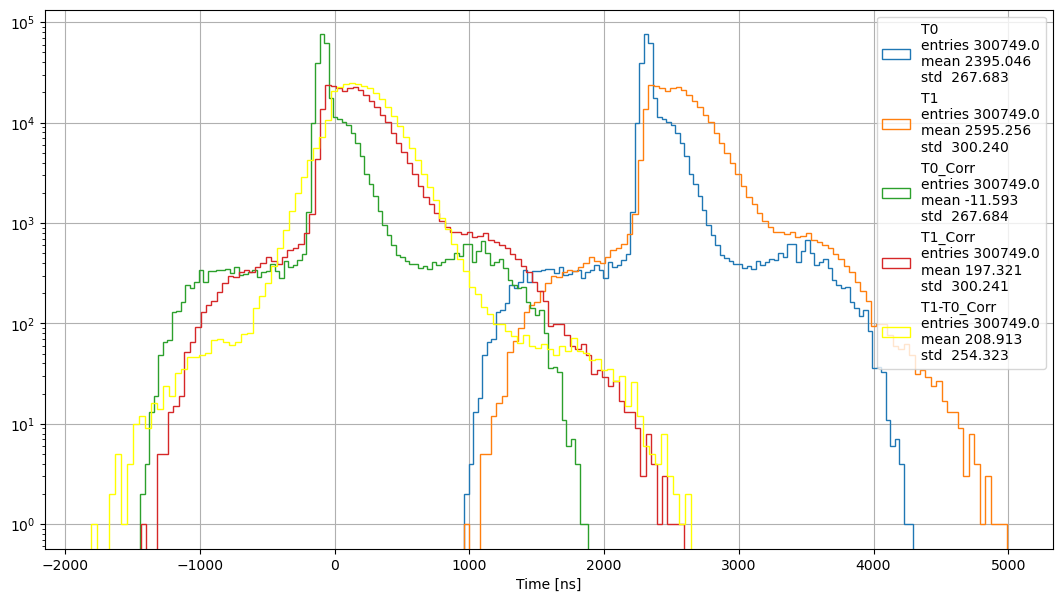

In [32]:
fig = plt.figure(figsize=(13,7))

pltext.hist(t0, 100, xylabels=("Time [ns]"), ylog = True, label="T0");
pltext.hist(t1, 100, ylog = True, label="T1");
pltext.hist(t0_trigger131, 100, ylog = True, label="T0_Corr");
pltext.hist(t1_trigger130, 100, ylog = True, label="T1_Corr");

c, b, _ = pltext.hist([i-j for (i,j) in zip(t1_trigger130, t0_trigger131)], 100, color="yellow", ylog = True, label="T1-T0_Corr");
# pltext.hist([i-j for (i,j) in zip(t1, t0)], 100, ylog = True, label="T1-T0");

In [ ]:
act1L_time = df["ACT1-L_time"]
act1R_time = df["ACT1-R_time"]

act1L_time_trigger130 = [i - j for (i,j) in zip(act1L_time, df["Trigger-130_time"])]
act1R_time_trigger130 = [i - j for (i,j) in zip(act1R_time, df["Trigger-130_time"])]

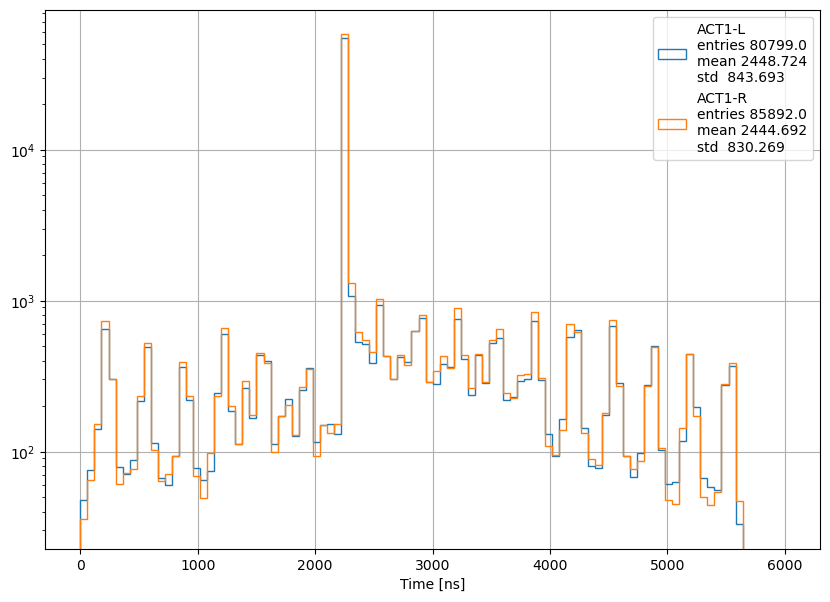

In [46]:
fig = plt.figure(figsize=(10,7))

pltext.hist(act1L_time, 100, xylabels=("Time [ns]"), ylog = True, range=(0.01,6000), label="ACT1-L");
pltext.hist(act1R_time, 100, ylog = True, range=(0.01,6000), label="ACT1-R");
# pltext.hist(act1L_time_trigger130, 100, xylabels=("Time [ns]"), ylog = True, label="ACT1-L_Corrected");
# pltext.hist(act1R_time_trigger130, 100, ylog = True, label="ACT1-R_Corrected");

In [ ]:
t10l = df["T1-0L_time"] - df["Trigger-130_time"]
t10r = df["T1-0R_time"] - df["Trigger-130_time"]
t11l = df["T1-1L_time"] - df["Trigger-130_time"]
t11r = df["T1-1R_time"] - df["Trigger-130_time"]

t00l = df["T0-0L_time"] - df["Trigger-131_time"]
t00r = df["T0-0R_time"] - df["Trigger-131_time"]
t01l = df["T0-1L_time"] - df["Trigger-131_time"]
t01r = df["T0-1R_time"] - df["Trigger-131_time"]

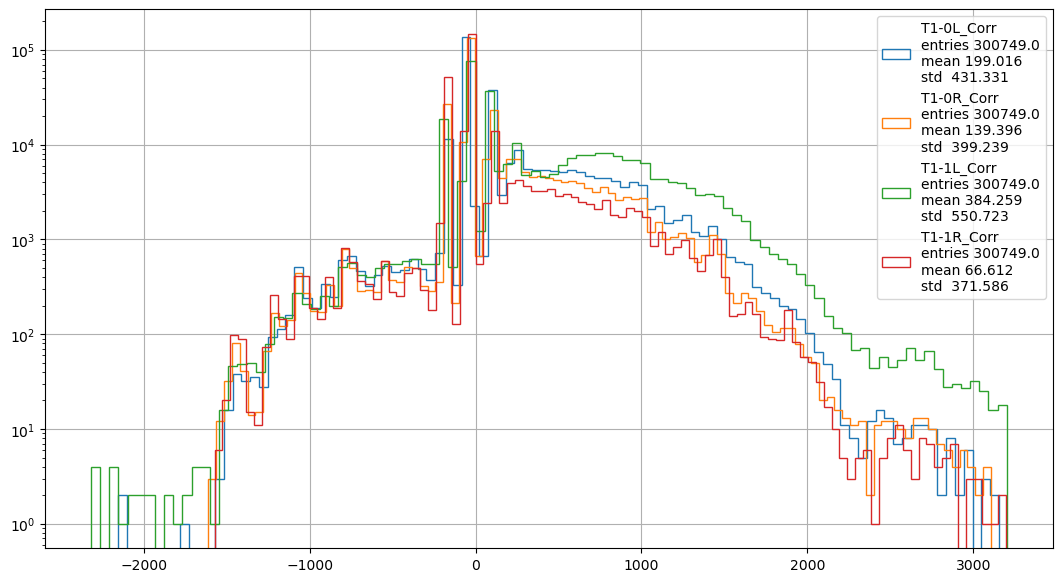

In [12]:
fig = plt.figure(figsize=(13,7))

pltext.hist(t10l, 100, ylog = True, label="T1-0L_Corr");
pltext.hist(t10r, 100, ylog = True, label="T1-0R_Corr");
pltext.hist(t11l, 100, ylog = True, label="T1-1L_Corr");
pltext.hist(t11r, 100, ylog = True, label="T1-1R_Corr");

# pltext.hist(t00l, 100, ylog = True, label="T0-0L_Corr");
# pltext.hist(t00r, 100, ylog = True, label="T0-0R_Corr");
# pltext.hist(t01l, 100, ylog = True, label="T0-1L_Corr");
# pltext.hist(t01r, 100, ylog = True, label="T0-1R_Corr");

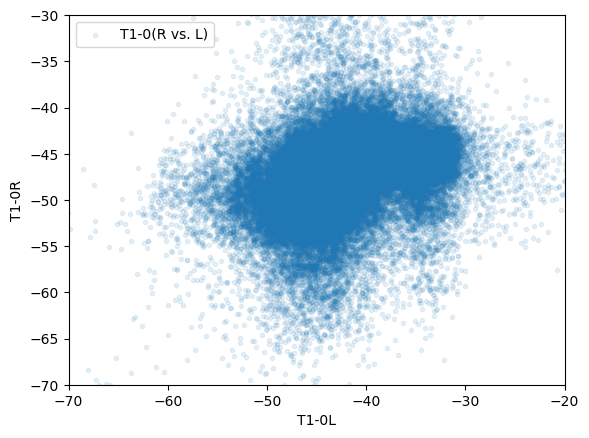

In [19]:
plt.scatter(t10l, t10r, marker=".", alpha=0.1, label="T1-0(R vs. L)");
plt.xlabel("T1-0L");
plt.ylabel("T1-0R");

plt.xlim(-70,-20);
plt.ylim(-70,-30);

plt.legend(loc="upper left");

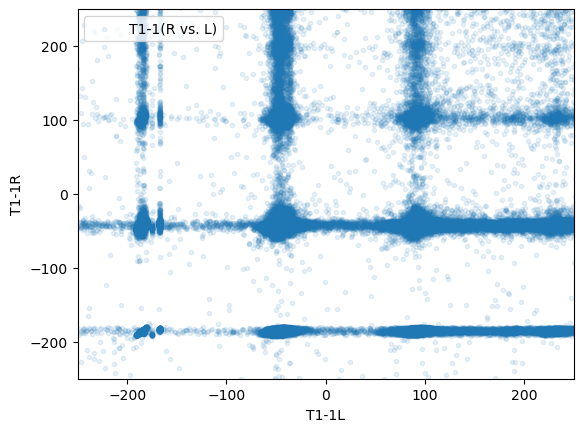

In [15]:
plt.scatter(t11l, t11r, marker=".", alpha=0.1, label="T1-1(R vs. L)");
plt.xlabel("T1-1L");
plt.ylabel("T1-1R");

plt.xlim(-250,250);
plt.ylim(-250,250);

plt.legend(loc="upper left");

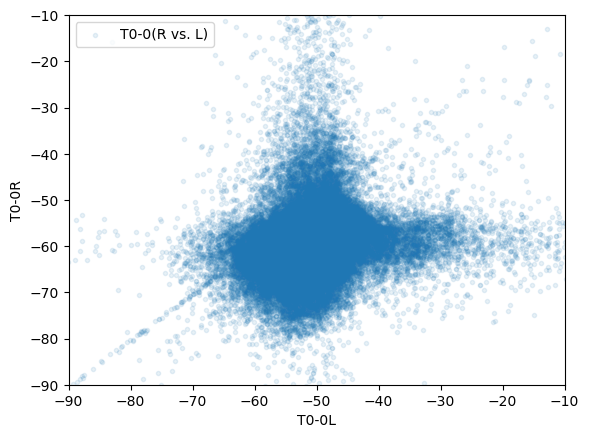

In [24]:
plt.scatter(t00l, t00r, marker=".", alpha=0.1, label="T0-0(R vs. L)");
plt.xlabel("T0-0L");
plt.ylabel("T0-0R");

plt.xlim(-90,-10);
plt.ylim(-90,-10);

plt.legend(loc="upper left");

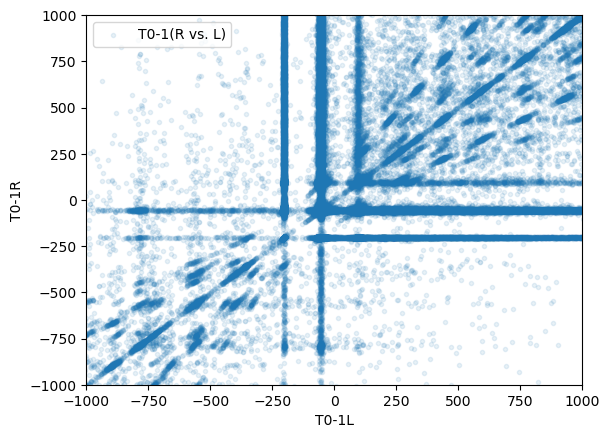

In [52]:
plt.scatter(t01l, t01r, marker=".", alpha=0.1, label="T0-1(R vs. L)");
plt.xlabel("T0-1L");
plt.ylabel("T0-1R");

plt.xlim(-1000,1000);
plt.ylim(-1000,1000);

plt.legend(loc="upper left");

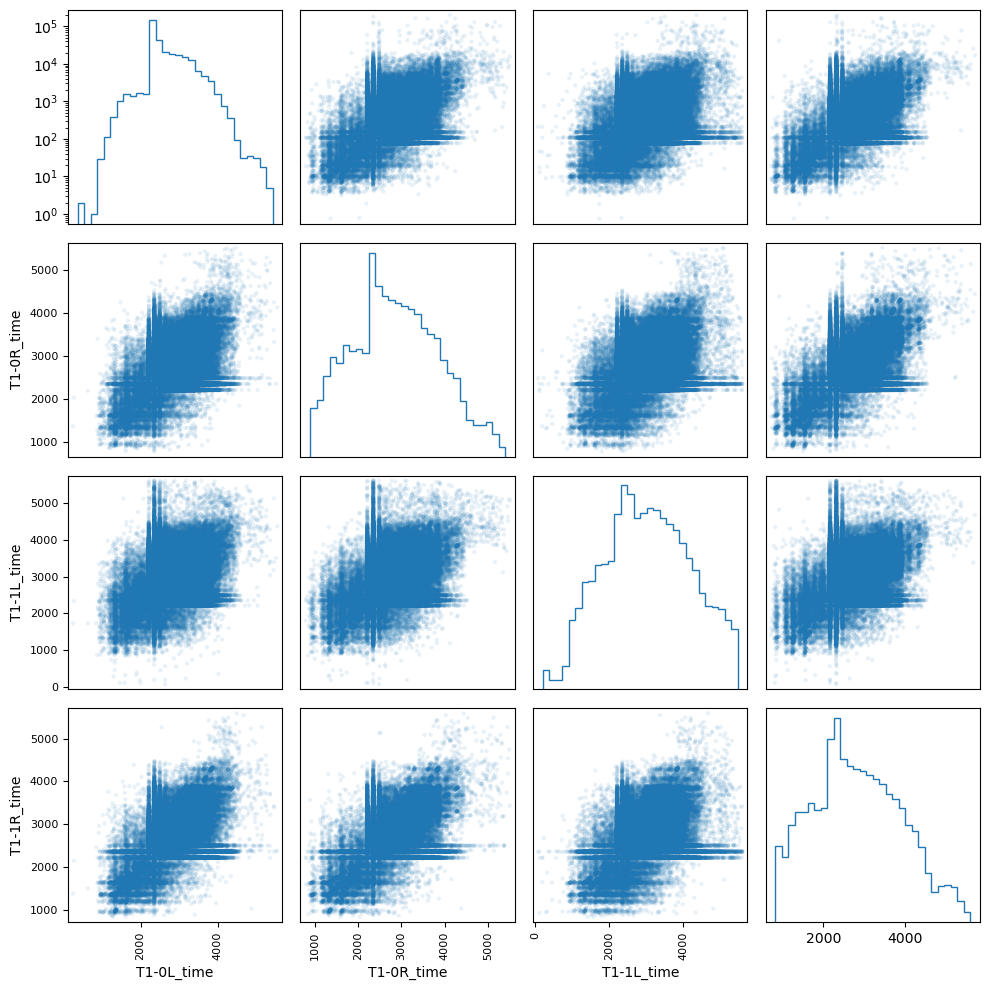

In [ ]:
t0 = ["T0-0L_time", "T0-0R_time", "T0-1L_time", "T0-1R_time"]
trigger_t0 = ["Trigger_131_time"]
t1 = ["T1-0L_time", "T1-0R_time", "T1-1L_time", "T1-1R_time"]
trigger_t1 = ["Trigger_130_time"]

# Crear scatter matrix
axes = pd.plotting.scatter_matrix(df[t1], alpha=0.1, figsize=(10, 10), diagonal=None)

# Modificar la diagonal: hacer histogramas tipo 'step' y aplicar escala log
num_vars = len(t1)

for i in range(num_vars):
    ax = axes[i, i]
    data = df[t1].iloc[:, i].dropna()

    ax.clear()  # Limpia lo que haya por defecto
    ax.hist(data, bins=30, histtype='step')
    ax.set_yscale('log')

plt.tight_layout()
plt.show()